In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

            dw = 1/m * np.dot(X.T, (h - y))
            db = 1/m * np.sum(h - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        return np.round(h)

# Example usage:
# Assuming X_train and y_train are your training data
X_train = np.array([[2.5, 3.5], [1.5, 2.5], [3.5, 4.5], [4.5, 5.5]])
y_train = np.array([0, 0, 1, 1])

# Initialize and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Predict on new data
X_test = np.array([[3, 4], [1, 2]])
predictions = model.predict(X_test)
print("Predictions:", predictions)


Predictions: [1. 0.]


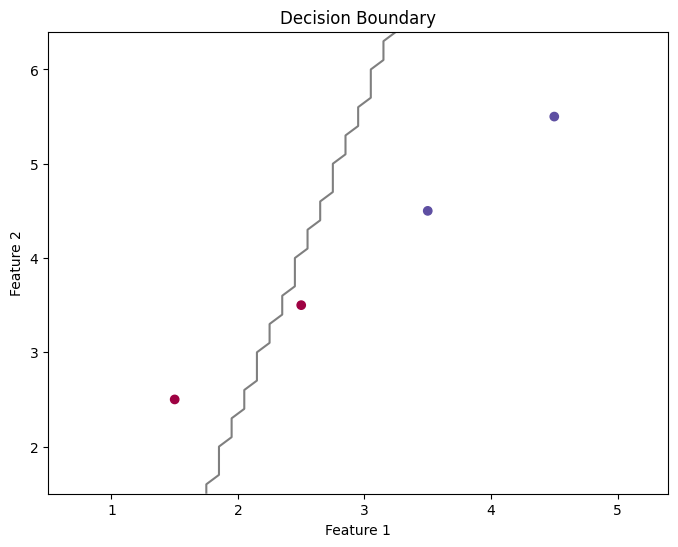

In [2]:
import matplotlib.pyplot as plt

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='k', levels=[0.5], alpha=0.5)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Example usage:
# Assuming X_train and y_train are your training data
X_train = np.array([[2.5, 3.5], [1.5, 2.5], [3.5, 4.5], [4.5, 5.5]])
y_train = np.array([0, 0, 1, 1])

# Initialize and train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, model)
plt.show()
